In [1]:
%cd C:\Users\yukir\Documents\GitHub\Scrapper\py

from nlp_processing import *
set_global_determinism(seed=1337)

%cd C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine

C:\Users\yukir\Documents\GitHub\Scrapper\py
True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13294868259735118353
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5822518875353412884
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6258788893851768535
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5674499422558612773
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine


In [2]:
final_review = pd.read_csv("C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\final_reviews.csv", index_col = 0)
final_review.head(2)

,hospital,stars,reviews,adress
0,청주나비솔한의원,10.0,병원이 전반적으로 깔끔해서 쾌적했어요대기가 좀 있지만 심하진 않은편이었고 간호사분들...,충북
1,청주나비솔한의원,7.5,체인 한의원이라서 망설였는데 시설도 깔끔하고 진료도 친절하게 너무 잘 봐주셨어요 그...,충북


In [3]:
df = final_review.copy()
print(df.shape)

(14989, 4)


In [4]:
df = df.dropna(axis=0)
print(df.shape)

(14988, 4)


{'whiskers': [<matplotlib.lines.Line2D at 0x1a361fdb3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a361fdba30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a361fbff40>],
 'medians': [<matplotlib.lines.Line2D at 0x1a361fe9190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a361fe9520>],
 'means': []}

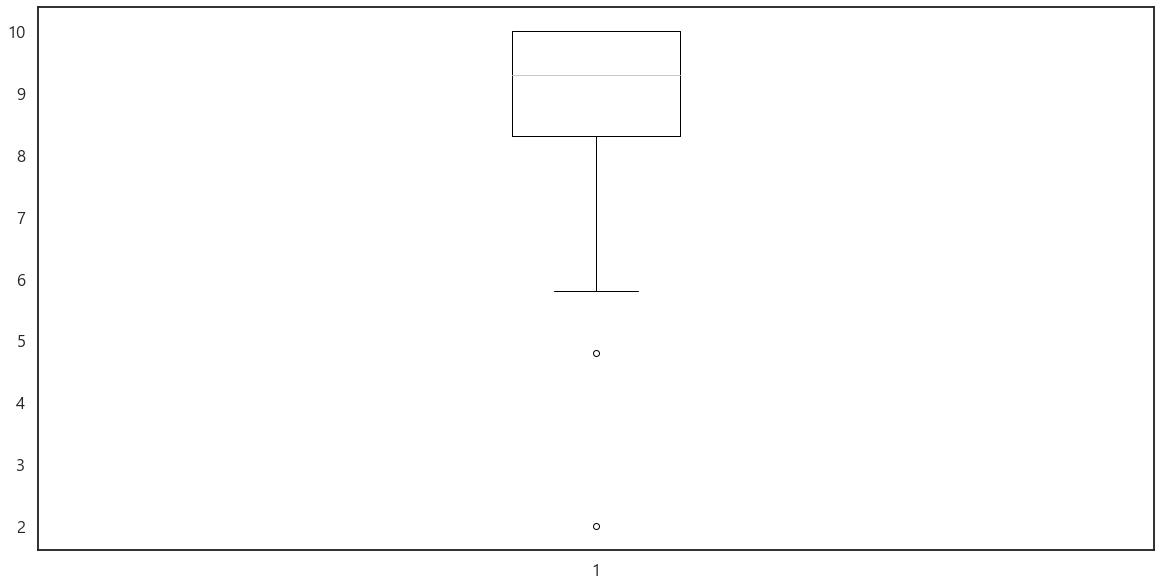

In [5]:
region= df[df['adress'] == '부산']
plt.boxplot(region.stars)

In [6]:
df_more6 = region[region['stars'] < 8.3]
print(df_more6.shape)
df_more6.head()

(62, 4)


,hospital,stars,reviews,adress
76,강내과의원서강약손한의원,7.8,영방과 한방을 다 접목해서 진료를 봐줘서 좋음 친절하게 상담해주시고 한약도 지어먹을...,부산
77,강내과의원서강약손한의원,8.0,감기원장님의 친절한 설명과 환자 말을 잘 들어 주시려고 하시는 모습이 참 좋았습니다...,부산
198,안한의원,8.0,팔목이 아파서 지인이소개해서 침을 맞았는데 많이 좋아졌어요 그 이후 다리가 당길때 ...,부산
390,명지365다나슬한의원,6.5,일요일급하게 갈병원이 없어서 신랑이랑 갔는데 다시는 갈일이 없을거 같네요 정말 이런...,부산
391,명지365다나슬한의원,7.8,골프로 허리가 안좋아서 갔는데 침도 잘놔줘서 효과가 있었습니다 여러번 방문했고 할때...,부산


In [7]:
from konlpy.tag import Okt
okt = Okt()

In [8]:
def make_noun(x):
    x = okt.nouns(x)
    return x

In [9]:
df_more6['reviews'] = df_more6['reviews'].apply(make_noun)
for_network = df_more6.copy()
df_more6['reviews'].head()

C:\Users\yukir\AppData\Local\Temp/ipykernel_16112/3817455113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more6['reviews'] = df_more6['reviews'].apply(make_noun)


76     [방과, 방, 접목, 진료, 상담, 한약, 위치, 이마트, 앞, 주차, 한약, 기적...
77     [감기, 원장, 설명, 환자, 말, 모습, 감기, 내, 약, 주사, 다른, 곳, 가...
198    [팔목, 지인, 소개, 침, 그, 이후, 다리, 때, 머리, 이유, 때, 목, 때,...
390    [일요일, 병원, 신랑, 일이, 정말, 대충, 치료, 신설, 의사, 설명, 것, 전...
391    [골프, 허리, 침, 효과, 번, 방문, 때, 주차장, 좀, 협소해, 주차, 공간,...
Name: reviews, dtype: object

In [10]:
# 여기서부터 조심해서 네트워크 해보기
df_more6['reviews']  = [" ".join(review) for review in df_more6['reviews'].values]
df_more6['reviews'].head() 

C:\Users\yukir\AppData\Local\Temp/ipykernel_16112/853035387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more6['reviews']  = [" ".join(review) for review in df_more6['reviews'].values]


76              방과 방 접목 진료 상담 한약 위치 이마트 앞 주차 한약 기적 건강 도움
77     감기 원장 설명 환자 말 모습 감기 내 약 주사 다른 곳 가족 자주 곳 병원 시설 ...
198    팔목 지인 소개 침 그 이후 다리 때 머리 이유 때 목 때 등 병원 침 먼저 선생님...
390    일요일 병원 신랑 일이 정말 대충 치료 신설 의사 설명 것 전기 치료 끝 요 신분 한의원
391    골프 허리 침 효과 번 방문 때 주차장 좀 협소해 주차 공간 주차 좀 전반 시설 간...
Name: reviews, dtype: object

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋습니다. 
                             ngram_range=(1, 6), # BOW의 단위 갯수의 범위를 지정합니다.
                             max_features = 2000 # 만들 피처의 수, 단어의 수
                            )
vectorizer

TfidfVectorizer(max_features=2000, min_df=2, ngram_range=(1, 6))

In [12]:
# df['covid'] 만 벡터화 합니다.
feature_vector = vectorizer.fit_transform(df_more6['reviews'])
feature_vector.shape

(62, 451)

In [13]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

451


['가격', '가도', '가면', '가요', '가족', '간호사', '간호사 모두', '개선', '개월', '거북목']

In [14]:
pd.DataFrame(feature_vector[:].toarray(), columns=vocab).head()

,가격,가도,가면,가요,가족,간호사,간호사 모두,개선,개월,거북목,거의,건강,건물,건물 기분,건물 기분 다음,건물 기분 다음 방문,건물 기분 다음 방문 의사,검사,검사 지하철역,검사 지하철역 찾기,검사 지하철역 찾기 직원,검사 지하철역 찾기 직원 모두,검사 지하철역 찾기 직원 모두 분위기,검사 치료,검색,결과,계속,공간,관리,그냥,근육,근처,금액,기계,기분,기분 다음,기분 다음 방문,기분 다음 방문 의사,기억,나니,나중,나중 치료,내부,느낌,다른,다른 병원,다리,다만,다시,다음,...,침대,침술,크게,통증,통증 방문,통증 방문 진료,퇴근,편이,편임,푸른,푸른 한의원,프로그램,하나,하니,한약,한약 개월,한약 효과,한의사,한의사 선생님,한의원,한의원 건물,한의원 건물 기분,한의원 건물 기분 다음,한의원 건물 기분 다음 방문,한의원 건물 기분 다음 방문 의사,한의원 방문,한의원 원장,한의학,할머니,할인,항상,항상 점심시간,항상 점심시간 직원,항상 점심시간 직원 치료,항상 점심시간 직원 치료 치료,항상 점심시간 직원 치료 치료 전기,해주시,해주시 치료,해주시 치료 결과,허리,허리 통증,호전,확인,환자,효과,효과 추후,효과 추후 증상,효과 추후 증상 복용,효과 추후 증상 복용 두통,효과 추후 증상 복용 두통 방문
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.419631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.593837,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.276711,0.000000,0.276711,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.209606,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.276711,0.241762,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.201548,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.275068,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.255503,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.224467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.000000,0.266043,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.404787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.294835,0.0,0.0,0.0,0.000000,0.225463,0.0,0.0,0.0,0.0,0.0


In [15]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
# 
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
print(df_freq.shape)
df_freq.to_excel('df_freq.xlsx', encoding= 'utf-8')

(1, 451)


In [16]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬합니다.
df_freq.T.sort_values(by=0, ascending=False).head(20)

,0
치료,6.273036
진료,4.568138
병원,3.967804
방문,3.791791
한약,3.035494
시간,2.861249
설명,2.839376
한의원,2.797709
효과,2.793197
선생님,2.724927


In [17]:
# ["course", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["words", "freq"]
df_freq_T.tail()
# df_freq_T.to_excel('df_freq_T.xlsx', encoding= 'utf-8')

,words,freq
446,효과 추후,0.227195
447,효과 추후 증상,0.227195
448,효과 추후 증상 복용,0.227195
449,효과 추후 증상 복용 두통,0.227195
450,효과 추후 증상 복용 두통 방문,0.227195


In [18]:
# 3개의 ngram과 빈도수로 역순 정렬을 하게 되면 빈도수가 높고, ngram수가 많은 순으로 정렬이 됨 
# 여기에서 drop_duplicates로 중복을 삭제 합니다.
print(df_freq_T.shape)
df_use = df_freq_T.drop_duplicates()
print(df_use.shape)

(451, 2)
(451, 2)


In [19]:
# 빈도수로 정렬을 하고 어떤 강좌가 댓글에서 가장 많이 언급되었는지 봅니다.
df_use = df_use.sort_values(by="freq", ascending=False)
df_use.head(20)

,words,freq
366,치료,6.273036
323,진료,4.568138
124,병원,3.967804
114,방문,3.791791
415,한약,3.035494
194,시간,2.861249
185,설명,2.839376
420,한의원,2.797709
445,효과,2.793197
178,선생님,2.724927


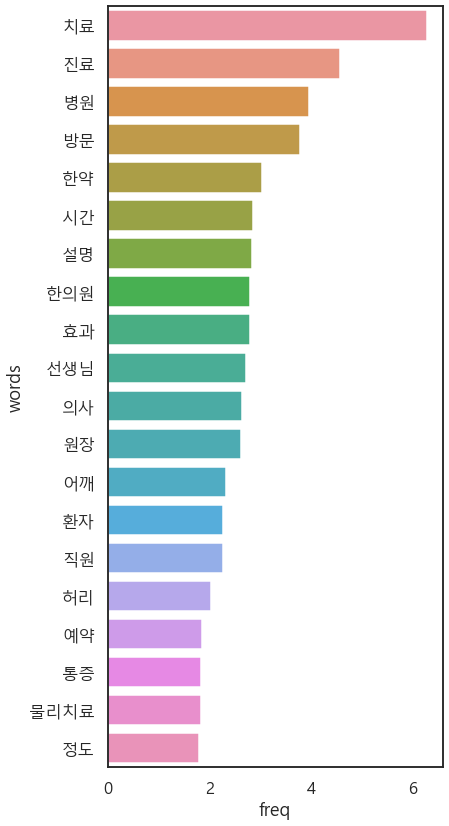

In [20]:
import seaborn as sns
plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,14))
ax = sns.barplot(x = 'freq', y = 'words', 
                 data = df_use.sort_values(by = 'freq', 
                                               ascending = False).head(20))
# ax.set(xlabel = 'Overall', ylabel = 'Pokemon')
# plt.savefig('covid2_frequency.png')
plt.show()


In [21]:
words_v2 = []

for num, i in enumerate (df_use.words):
  words_v2.append((i, int(df_use.freq[num])))

words_clean = words_v2.copy()

In [22]:
words_clean

[('치료', 1),
 ('진료', 0),
 ('병원', 0),
 ('방문', 0),
 ('한약', 0),
 ('시간', 1),
 ('설명', 0),
 ('한의원', 1),
 ('효과', 0),
 ('선생님', 1),
 ('의사', 0),
 ('원장', 0),
 ('어깨', 0),
 ('환자', 0),
 ('직원', 0),
 ('허리', 0),
 ('예약', 0),
 ('통증', 1),
 ('물리치료', 0),
 ('정도', 0),
 ('간호사', 0),
 ('분위기', 0),
 ('시설', 0),
 ('대기', 0),
 ('위치', 0),
 ('조금', 0),
 ('그냥', 0),
 ('의사 선생님', 0),
 ('무난', 0),
 ('주차', 1),
 ('다른', 0),
 ('정말', 1),
 ('해주시', 1),
 ('대한', 0),
 ('미리', 0),
 ('크게', 0),
 ('상담', 0),
 ('느낌', 0),
 ('금액', 0),
 ('개선', 0),
 ('별로', 0),
 ('진맥', 0),
 ('지인', 0),
 ('모두', 1),
 ('대기 시간', 1),
 ('자주', 0),
 ('가격', 0),
 ('상태', 0),
 ('검사', 0),
 ('이유', 0),
 ('찜질', 0),
 ('근처', 0),
 ('운동', 0),
 ('진단', 0),
 ('때문', 0),
 ('거북목', 0),
 ('전기', 0),
 ('바로', 0),
 ('방문 의사', 1),
 ('자체', 1),
 ('매우', 1),
 ('한의사', 0),
 ('기계', 0),
 ('내부', 0),
 ('동네', 0),
 ('침대', 0),
 ('개월', 0),
 ('할머니', 0),
 ('대해', 0),
 ('증상', 0),
 ('청결', 0),
 ('편이', 0),
 ('생각', 0),
 ('주사', 0),
 ('허리 통증', 0),
 ('항상', 0),
 ('신경', 0),
 ('다리', 0),
 ('차도', 0),
 ('처방', 0),
 ('추천', 0),
 ('지인

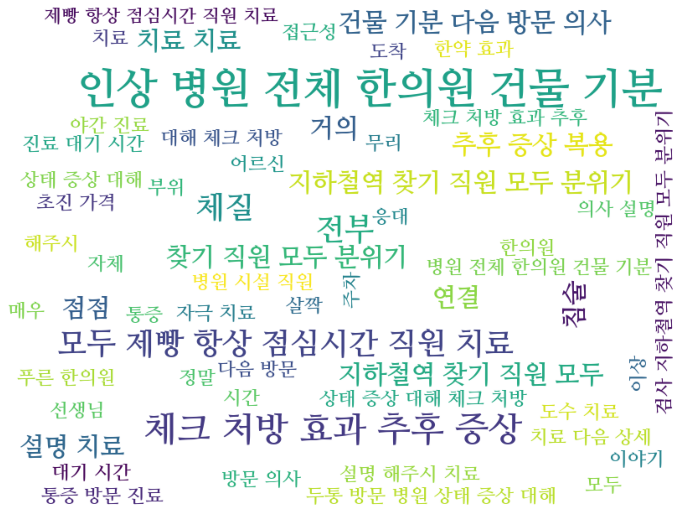

In [23]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\NanumMyeongjoBold.ttf",
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## **FOR**

In [24]:
j = 0

del_list = []
keyword_len =[]

for num, i in enumerate(words_clean):
    if '두통' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)
print(j)
print(len(del_list)) 
print(len(keyword_len))       

88 ('두통', 0)
198 ('두통 방문 병원', 0)
199 ('두통 방문', 0)
272 ('두통 방문 병원 상태 증상 대해', 1)
273 ('복용 두통 방문 병원', 0)
274 ('증상 복용 두통 방문 병원', 0)
275 ('복용 두통 방문', 0)
276 ('증상 복용 두통 방문', 0)
277 ('증상 복용 두통', 0)
278 ('효과 추후 증상 복용 두통 방문', 0)
281 ('처방 효과 추후 증상 복용 두통', 0)
290 ('두통 방문 병원 상태', 0)
293 ('두통 방문 병원 상태 증상', 0)
300 ('효과 추후 증상 복용 두통', 0)
313 ('복용 두통', 0)
314 ('추후 증상 복용 두통 방문 병원', 0)
317 ('추후 증상 복용 두통 방문', 0)
319 ('추후 증상 복용 두통', 0)
1
18
18


In [25]:
j =0
keyword_len =[]
for num, i in enumerate(words_clean):
    if '체크' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)

print(j)
print(len(del_list))
print(len(keyword_len))  

107 ('체크', 0)
282 ('증상 대해 체크 처방 효과 추후', 0)
285 ('상태 증상 대해 체크', 0)
286 ('상태 증상 대해 체크 처방', 1)
287 ('상태 증상 대해 체크 처방 효과', 0)
292 ('증상 대해 체크 처방 효과', 0)
294 ('대해 체크 처방 효과 추후 증상', 0)
297 ('대해 체크', 0)
299 ('대해 체크 처방', 1)
301 ('병원 상태 증상 대해 체크', 0)
303 ('대해 체크 처방 효과', 0)
304 ('병원 상태 증상 대해 체크 처방', 0)
306 ('대해 체크 처방 효과 추후', 0)
307 ('증상 대해 체크 처방', 0)
310 ('방문 병원 상태 증상 대해 체크', 0)
311 ('체크 처방 효과 추후 증상 복용', 0)
312 ('증상 대해 체크', 0)
320 ('체크 처방', 0)
321 ('체크 처방 효과', 0)
322 ('체크 처방 효과 추후', 1)
323 ('체크 처방 효과 추후 증상', 4)
7
39
21


In [26]:
j =0
keyword_len =[]

for num, i in enumerate(words_clean):
    if '지하철역' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)

print(j)
print(len(del_list))
print(len(keyword_len))  

256 ('지하철역', 0)
326 ('치료 다음 상세 검사 지하철역', 0)
328 ('치료 다음 상세 검사 지하철역 찾기', 0)
336 ('다음 상세 검사 지하철역 찾기 직원', 0)
337 ('다음 상세 검사 지하철역 찾기', 0)
338 ('다음 상세 검사 지하철역', 0)
360 ('상세 검사 지하철역 찾기 직원', 0)
367 ('검사 지하철역 찾기 직원 모두', 0)
386 ('상세 검사 지하철역 찾기', 0)
387 ('상세 검사 지하철역', 0)
398 ('부항 치료 다음 상세 검사 지하철역', 0)
403 ('검사 지하철역 찾기 직원 모두 분위기', 1)
408 ('검사 지하철역 찾기 직원', 0)
432 ('검사 지하철역 찾기', 0)
439 ('검사 지하철역', 0)
442 ('지하철역 찾기', 0)
443 ('지하철역 찾기 직원', 0)
444 ('지하철역 찾기 직원 모두', 2)
445 ('지하철역 찾기 직원 모두 분위기', 2)
446 ('지하철역 찾기 직원 모두 분위기 인상', 0)
448 ('상세 검사 지하철역 찾기 직원 모두', 0)
5
60
21


In [27]:
j =0
keyword_len =[]

for num, i in enumerate(words_clean):
    if '치료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)

print(j)
print(len(del_list))
print(len(keyword_len))  

0 ('치료', 1)
18 ('물리치료', 0)
109 ('도수 치료', 1)
118 ('진료 치료', 0)
133 ('추나 치료', 0)
142 ('조금 치료', 0)
144 ('원장 치료', 0)
145 ('치료 직원', 0)
153 ('치료 한약', 0)
156 ('치료 대한 설명 해주시', 0)
158 ('치료 대한 설명', 0)
159 ('치료 대한', 0)
164 ('전기 치료', 0)
180 ('치료 효과', 0)
203 ('물리치료 치료', 0)
215 ('설명 치료', 2)
216 ('원장 치료 대한 설명 해주시', 0)
217 ('원장 치료 대한', 0)
218 ('원장 치료 대한 설명', 0)
221 ('부항 치료', 0)
223 ('치료 진료', 0)
224 ('해주시 치료', 0)
225 ('설명 해주시 치료', 1)
226 ('대한 설명 해주시 치료', 0)
227 ('치료 대한 설명 해주시 치료', 0)
228 ('치료 치료', 2)
239 ('치료 물리치료', 0)
245 ('치료 나중', 0)
258 ('치료 다음', 0)
259 ('검사 치료', 0)
262 ('치료 결과', 0)
263 ('대한 설명 해주시 치료 결과', 0)
264 ('설명 해주시 치료 결과', 0)
265 ('원장 치료 대한 설명 해주시 치료', 0)
266 ('해주시 치료 결과', 0)
267 ('치료 대한 설명 해주시 치료 결과', 0)
269 ('치료 나중 치료', 0)
270 ('나중 치료', 0)
271 ('자극 치료', 1)
325 ('치료 다음 상세 검사', 0)
326 ('치료 다음 상세 검사 지하철역', 0)
327 ('치료 다음 상세', 1)
328 ('치료 다음 상세 검사 지하철역 찾기', 0)
341 ('치료 치료 전기 치료 부항 치료', 0)
342 ('치료 치료 전기 치료 부항', 0)
344 ('치료 치료 전기 치료', 0)
345 ('치료 치료 전기', 0)
346 ('항상 점심시간 직원 치료', 0)
347 ('치료 전기 치료

In [28]:
j =0
keyword_len =[]

for num, i in enumerate(words_clean):
    if '분위기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)

print(j)
print(len(del_list))
print(len(keyword_len))  

21 ('분위기', 0)
361 ('모두 분위기', 0)
384 ('모두 분위기 인상', 0)
393 ('분위기 인상 병원 전체 한의원 건물', 0)
394 ('분위기 인상 병원 전체 한의원', 0)
395 ('분위기 인상 병원 전체', 0)
396 ('분위기 인상 병원', 0)
397 ('분위기 인상', 0)
403 ('검사 지하철역 찾기 직원 모두 분위기', 1)
420 ('찾기 직원 모두 분위기', 2)
421 ('찾기 직원 모두 분위기 인상', 0)
422 ('찾기 직원 모두 분위기 인상 병원', 0)
425 ('모두 분위기 인상 병원 전체 한의원', 0)
426 ('모두 분위기 인상 병원 전체', 0)
427 ('모두 분위기 인상 병원', 0)
429 ('직원 모두 분위기 인상 병원 전체', 0)
430 ('직원 모두 분위기 인상 병원', 0)
441 ('직원 모두 분위기 인상', 0)
445 ('지하철역 찾기 직원 모두 분위기', 2)
446 ('지하철역 찾기 직원 모두 분위기 인상', 0)
449 ('직원 모두 분위기', 0)
5
161
21


In [29]:
j =0
keyword_len =[]

for num, i in enumerate(words_clean):
    if '부항' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)

print(j)
print(len(del_list))
print(len(keyword_len))  

138 ('부항', 0)
221 ('부항 치료', 0)
341 ('치료 치료 전기 치료 부항 치료', 0)
342 ('치료 치료 전기 치료 부항', 0)
347 ('치료 전기 치료 부항 치료 다음', 0)
348 ('치료 전기 치료 부항', 0)
351 ('치료 부항 치료 다음 상세 검사', 0)
352 ('치료 부항 치료 다음 상세', 0)
353 ('치료 부항 치료 다음', 0)
354 ('치료 부항 치료', 0)
355 ('치료 부항', 0)
359 ('치료 전기 치료 부항 치료', 0)
368 ('전기 치료 부항', 0)
369 ('전기 치료 부항 치료', 0)
370 ('전기 치료 부항 치료 다음', 0)
371 ('전기 치료 부항 치료 다음 상세', 0)
398 ('부항 치료 다음 상세 검사 지하철역', 0)
399 ('부항 치료 다음 상세 검사', 0)
400 ('부항 치료 다음 상세', 0)
401 ('부항 치료 다음', 0)
412 ('직원 치료 치료 전기 치료 부항', 0)
0
182
21


In [30]:
j =0
keyword_len =[]

for num, i in enumerate(words_clean):
    if '직원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)

print(j)
print(len(del_list))
print(len(keyword_len))  

14 ('직원', 0)
145 ('치료 직원', 0)
182 ('직원 편이', 0)
242 ('직원 친절', 0)
249 ('병원 시설 직원', 1)
250 ('시설 직원', 0)
257 ('병원 직원', 0)
336 ('다음 상세 검사 지하철역 찾기 직원', 0)
343 ('항상 점심시간 직원', 0)
346 ('항상 점심시간 직원 치료', 0)
356 ('항상 점심시간 직원 치료 치료', 0)
357 ('항상 점심시간 직원 치료 치료 전기', 0)
360 ('상세 검사 지하철역 찾기 직원', 0)
367 ('검사 지하철역 찾기 직원 모두', 0)
379 ('점심시간 직원', 0)
380 ('점심시간 직원 치료', 0)
381 ('점심시간 직원 치료 치료', 0)
392 ('선생님 모두 제빵 항상 점심시간 직원', 0)
403 ('검사 지하철역 찾기 직원 모두 분위기', 1)
405 ('점심시간 직원 치료 치료 전기', 0)
406 ('점심시간 직원 치료 치료 전기 치료', 0)
408 ('검사 지하철역 찾기 직원', 0)
409 ('직원 치료 치료', 0)
410 ('직원 치료 치료 전기', 0)
411 ('직원 치료 치료 전기 치료', 0)
412 ('직원 치료 치료 전기 치료 부항', 0)
415 ('모두 제빵 항상 점심시간 직원 치료', 3)
416 ('모두 제빵 항상 점심시간 직원', 0)
418 ('찾기 직원', 0)
419 ('찾기 직원 모두', 0)
420 ('찾기 직원 모두 분위기', 2)
421 ('찾기 직원 모두 분위기 인상', 0)
422 ('찾기 직원 모두 분위기 인상 병원', 0)
428 ('직원 치료', 0)
429 ('직원 모두 분위기 인상 병원 전체', 0)
430 ('직원 모두 분위기 인상 병원', 0)
436 ('제빵 항상 점심시간 직원', 0)
437 ('제빵 항상 점심시간 직원 치료', 1)
438 ('제빵 항상 점심시간 직원 치료 치료', 0)
441 ('직원 모두 분위기 인상', 0)
443 ('지하철역 찾기 직원',

In [31]:
j =0
keyword_len =[]

for num, i in enumerate(words_clean):
    if '제빵' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)

print(j)
print(len(del_list))
print(len(keyword_len))  

389 ('선생님 모두 제빵', 0)
390 ('선생님 모두 제빵 항상', 0)
391 ('선생님 모두 제빵 항상 점심시간', 0)
392 ('선생님 모두 제빵 항상 점심시간 직원', 0)
415 ('모두 제빵 항상 점심시간 직원 치료', 3)
416 ('모두 제빵 항상 점심시간 직원', 0)
417 ('모두 제빵 항상 점심시간', 0)
423 ('모두 제빵 항상', 0)
424 ('모두 제빵', 0)
433 ('제빵', 0)
434 ('제빵 항상', 0)
435 ('제빵 항상 점심시간', 0)
436 ('제빵 항상 점심시간 직원', 0)
437 ('제빵 항상 점심시간 직원 치료', 1)
438 ('제빵 항상 점심시간 직원 치료 치료', 0)
4
244
15


In [32]:
j =0
keyword_len =[]

for num, i in enumerate(words_clean):
    if '방문' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)

print(j)
print(len(del_list))
print(len(keyword_len))  

3 ('방문', 0)
58 ('방문 의사', 1)
97 ('방문 병원', 0)
122 ('방문 진료', 0)
134 ('통증 방문', 0)
188 ('방문 원장', 0)
198 ('두통 방문 병원', 0)
199 ('두통 방문', 0)
202 ('한의원 방문', 0)
229 ('통증 방문 진료', 1)
272 ('두통 방문 병원 상태 증상 대해', 1)
273 ('복용 두통 방문 병원', 0)
274 ('증상 복용 두통 방문 병원', 0)
275 ('복용 두통 방문', 0)
276 ('증상 복용 두통 방문', 0)
278 ('효과 추후 증상 복용 두통 방문', 0)
290 ('두통 방문 병원 상태', 0)
293 ('두통 방문 병원 상태 증상', 0)
310 ('방문 병원 상태 증상 대해 체크', 0)
314 ('추후 증상 복용 두통 방문 병원', 0)
315 ('방문 병원 상태', 0)
316 ('방문 병원 상태 증상', 0)
317 ('추후 증상 복용 두통 방문', 0)
318 ('방문 병원 상태 증상 대해', 0)
330 ('다음 방문', 1)
331 ('다음 방문 의사', 0)
334 ('한의원 건물 기분 다음 방문', 0)
335 ('한의원 건물 기분 다음 방문 의사', 0)
377 ('전체 한의원 건물 기분 다음 방문', 0)
407 ('기분 다음 방문', 0)
431 ('기분 다음 방문 의사', 0)
440 ('건물 기분 다음 방문 의사', 2)
447 ('건물 기분 다음 방문', 0)
6
277
33


In [40]:
j =0
keyword_len =[]

for num, i in enumerate(words_clean):
    if '인상' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)

print(j)
print(len(del_list))
print(len(keyword_len))  

112 ('인상', 0)
363 ('인상 병원 전체', 0)
364 ('인상 병원 전체 한의원', 0)
365 ('인상 병원 전체 한의원 건물', 0)
366 ('인상 병원 전체 한의원 건물 기분', 6)
382 ('인상 병원', 0)
384 ('모두 분위기 인상', 0)
393 ('분위기 인상 병원 전체 한의원 건물', 0)
394 ('분위기 인상 병원 전체 한의원', 0)
395 ('분위기 인상 병원 전체', 0)
396 ('분위기 인상 병원', 0)
397 ('분위기 인상', 0)
421 ('찾기 직원 모두 분위기 인상', 0)
422 ('찾기 직원 모두 분위기 인상 병원', 0)
425 ('모두 분위기 인상 병원 전체 한의원', 0)
426 ('모두 분위기 인상 병원 전체', 0)
427 ('모두 분위기 인상 병원', 0)
429 ('직원 모두 분위기 인상 병원 전체', 0)
430 ('직원 모두 분위기 인상 병원', 0)
441 ('직원 모두 분위기 인상', 0)
446 ('지하철역 찾기 직원 모두 분위기 인상', 0)
6
386
21


In [34]:
j =0
keyword_len =[]

for num, i in enumerate(words_clean):
    if '전체' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)

print(j)
print(len(del_list))
print(len(keyword_len))  

201 ('전체', 0)
362 ('병원 전체', 0)
363 ('인상 병원 전체', 0)
364 ('인상 병원 전체 한의원', 0)
365 ('인상 병원 전체 한의원 건물', 0)
366 ('인상 병원 전체 한의원 건물 기분', 6)
373 ('전체 한의원', 0)
374 ('전체 한의원 건물', 0)
375 ('전체 한의원 건물 기분', 0)
376 ('전체 한의원 건물 기분 다음', 0)
377 ('전체 한의원 건물 기분 다음 방문', 0)
383 ('병원 전체 한의원', 0)
385 ('병원 전체 한의원 건물', 0)
393 ('분위기 인상 병원 전체 한의원 건물', 0)
394 ('분위기 인상 병원 전체 한의원', 0)
395 ('분위기 인상 병원 전체', 0)
402 ('병원 전체 한의원 건물 기분 다음', 0)
404 ('병원 전체 한의원 건물 기분', 1)
425 ('모두 분위기 인상 병원 전체 한의원', 0)
426 ('모두 분위기 인상 병원 전체', 0)
429 ('직원 모두 분위기 인상 병원 전체', 0)
7
319
21


In [35]:
j =0
keyword_len =[]

for num, i in enumerate(words_clean):
    if '건물' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)

print(j)
print(len(del_list))
print(len(keyword_len))  

127 ('건물', 0)
329 ('한의원 건물', 0)
332 ('한의원 건물 기분', 0)
333 ('한의원 건물 기분 다음', 0)
334 ('한의원 건물 기분 다음 방문', 0)
335 ('한의원 건물 기분 다음 방문 의사', 0)
365 ('인상 병원 전체 한의원 건물', 0)
366 ('인상 병원 전체 한의원 건물 기분', 6)
374 ('전체 한의원 건물', 0)
375 ('전체 한의원 건물 기분', 0)
376 ('전체 한의원 건물 기분 다음', 0)
377 ('전체 한의원 건물 기분 다음 방문', 0)
385 ('병원 전체 한의원 건물', 0)
393 ('분위기 인상 병원 전체 한의원 건물', 0)
402 ('병원 전체 한의원 건물 기분 다음', 0)
404 ('병원 전체 한의원 건물 기분', 1)
413 ('건물 기분 다음', 0)
414 ('건물 기분', 0)
440 ('건물 기분 다음 방문 의사', 2)
447 ('건물 기분 다음 방문', 0)
9
339
20


In [36]:
j =0
keyword_len =[]

for num, i in enumerate(words_clean):
    if '한의원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
        keyword_len.append(i)

print(j)
print(len(del_list))
print(len(keyword_len))  

7 ('한의원', 1)
130 ('한의원 원장', 0)
137 ('무난 한의원', 0)
202 ('한의원 방문', 0)
205 ('동네 한의원', 0)
233 ('푸른 한의원', 1)
329 ('한의원 건물', 0)
332 ('한의원 건물 기분', 0)
333 ('한의원 건물 기분 다음', 0)
334 ('한의원 건물 기분 다음 방문', 0)
335 ('한의원 건물 기분 다음 방문 의사', 0)
364 ('인상 병원 전체 한의원', 0)
365 ('인상 병원 전체 한의원 건물', 0)
366 ('인상 병원 전체 한의원 건물 기분', 6)
373 ('전체 한의원', 0)
374 ('전체 한의원 건물', 0)
375 ('전체 한의원 건물 기분', 0)
376 ('전체 한의원 건물 기분 다음', 0)
377 ('전체 한의원 건물 기분 다음 방문', 0)
383 ('병원 전체 한의원', 0)
385 ('병원 전체 한의원 건물', 0)
393 ('분위기 인상 병원 전체 한의원 건물', 0)
394 ('분위기 인상 병원 전체 한의원', 0)
402 ('병원 전체 한의원 건물 기분 다음', 0)
404 ('병원 전체 한의원 건물 기분', 1)
425 ('모두 분위기 인상 병원 전체 한의원', 0)
9
365
26


In [53]:
words_clean

[('치료', 1),
 ('진료', 0),
 ('병원', 0),
 ('방문', 0),
 ('한약', 0),
 ('시간', 1),
 ('설명', 0),
 ('한의원', 1),
 ('효과', 0),
 ('선생님', 1),
 ('의사', 0),
 ('원장', 0),
 ('어깨', 0),
 ('환자', 0),
 ('직원', 0),
 ('허리', 0),
 ('예약', 0),
 ('통증', 1),
 ('물리치료', 0),
 ('정도', 0),
 ('간호사', 0),
 ('분위기', 0),
 ('시설', 0),
 ('대기', 0),
 ('위치', 0),
 ('조금', 0),
 ('그냥', 0),
 ('의사 선생님', 0),
 ('무난', 0),
 ('주차', 1),
 ('다른', 0),
 ('정말', 1),
 ('해주시', 1),
 ('대한', 0),
 ('미리', 0),
 ('크게', 0),
 ('상담', 0),
 ('느낌', 0),
 ('금액', 0),
 ('개선', 0),
 ('별로', 0),
 ('진맥', 0),
 ('지인', 0),
 ('모두', 1),
 ('대기 시간', 1),
 ('자주', 0),
 ('가격', 0),
 ('상태', 0),
 ('검사', 0),
 ('이유', 0),
 ('찜질', 0),
 ('근처', 0),
 ('운동', 0),
 ('진단', 0),
 ('때문', 0),
 ('거북목', 0),
 ('전기', 0),
 ('바로', 0),
 ('방문 의사', 1),
 ('자체', 1),
 ('매우', 1),
 ('한의사', 0),
 ('기계', 0),
 ('내부', 0),
 ('동네', 0),
 ('침대', 0),
 ('개월', 0),
 ('할머니', 0),
 ('대해', 0),
 ('증상', 0),
 ('청결', 0),
 ('편이', 0),
 ('생각', 0),
 ('주사', 0),
 ('허리 통증', 0),
 ('항상', 0),
 ('신경', 0),
 ('다리', 0),
 ('차도', 0),
 ('처방', 0),
 ('추천', 0),
 ('지인

In [54]:
del_list = list(map(int, del_list))
new_word_freq = [i for j, i in enumerate(words_clean) if j not in del_list]

In [55]:
new_word_freq

[('진료', 0),
 ('병원', 0),
 ('한약', 0),
 ('시간', 1),
 ('설명', 0),
 ('효과', 0),
 ('선생님', 1),
 ('의사', 0),
 ('원장', 0),
 ('어깨', 0),
 ('환자', 0),
 ('허리', 0),
 ('예약', 0),
 ('통증', 1),
 ('정도', 0),
 ('간호사', 0),
 ('시설', 0),
 ('대기', 0),
 ('위치', 0),
 ('조금', 0),
 ('그냥', 0),
 ('의사 선생님', 0),
 ('무난', 0),
 ('주차', 1),
 ('다른', 0),
 ('정말', 1),
 ('해주시', 1),
 ('대한', 0),
 ('미리', 0),
 ('크게', 0),
 ('상담', 0),
 ('느낌', 0),
 ('금액', 0),
 ('개선', 0),
 ('별로', 0),
 ('진맥', 0),
 ('지인', 0),
 ('모두', 1),
 ('대기 시간', 1),
 ('자주', 0),
 ('가격', 0),
 ('상태', 0),
 ('검사', 0),
 ('이유', 0),
 ('찜질', 0),
 ('근처', 0),
 ('운동', 0),
 ('진단', 0),
 ('때문', 0),
 ('거북목', 0),
 ('전기', 0),
 ('바로', 0),
 ('자체', 1),
 ('매우', 1),
 ('한의사', 0),
 ('기계', 0),
 ('내부', 0),
 ('동네', 0),
 ('침대', 0),
 ('개월', 0),
 ('할머니', 0),
 ('대해', 0),
 ('증상', 0),
 ('청결', 0),
 ('편이', 0),
 ('생각', 0),
 ('주사', 0),
 ('허리 통증', 0),
 ('항상', 0),
 ('신경', 0),
 ('다리', 0),
 ('차도', 0),
 ('처방', 0),
 ('추천', 0),
 ('지인 추천', 0),
 ('다음', 0),
 ('건강', 0),
 ('손목', 0),
 ('다시', 0),
 ('부위', 1),
 ('하나', 0),
 ('접수', 0

In [57]:
adding = ('두통', 19), ('체크', 28), ('지하철역', 26), ('치료', 93), ('분위기', 26), ('부항', 21), ('직원', 57),\
    ('제빵', 19), ('방문',39), ('인상', 27), ('전체', 28), ('건물', 29)

In [58]:
print(len(new_word_freq))

225


In [59]:
for i in adding:
    new_word_freq.append(i)

In [64]:
new_word_freq

[('진료', 0),
 ('병원', 0),
 ('한약', 0),
 ('설명', 0),
 ('효과', 0),
 ('의사', 0),
 ('원장', 0),
 ('어깨', 0),
 ('환자', 0),
 ('허리', 0),
 ('예약', 0),
 ('정도', 0),
 ('간호사', 0),
 ('시설', 0),
 ('대기', 0),
 ('위치', 0),
 ('조금', 0),
 ('그냥', 0),
 ('의사 선생님', 0),
 ('무난', 0),
 ('다른', 0),
 ('대한', 0),
 ('미리', 0),
 ('크게', 0),
 ('상담', 0),
 ('느낌', 0),
 ('금액', 0),
 ('개선', 0),
 ('별로', 0),
 ('진맥', 0),
 ('지인', 0),
 ('자주', 0),
 ('가격', 0),
 ('상태', 0),
 ('검사', 0),
 ('이유', 0),
 ('찜질', 0),
 ('근처', 0),
 ('운동', 0),
 ('진단', 0),
 ('때문', 0),
 ('거북목', 0),
 ('전기', 0),
 ('바로', 0),
 ('한의사', 0),
 ('기계', 0),
 ('내부', 0),
 ('동네', 0),
 ('침대', 0),
 ('개월', 0),
 ('할머니', 0),
 ('대해', 0),
 ('증상', 0),
 ('청결', 0),
 ('편이', 0),
 ('생각', 0),
 ('주사', 0),
 ('허리 통증', 0),
 ('항상', 0),
 ('신경', 0),
 ('다리', 0),
 ('차도', 0),
 ('처방', 0),
 ('추천', 0),
 ('지인 추천', 0),
 ('다음', 0),
 ('건강', 0),
 ('손목', 0),
 ('다시', 0),
 ('하나', 0),
 ('접수', 0),
 ('이후', 0),
 ('사람', 0),
 ('신분', 0),
 ('데스크', 0),
 ('초진', 0),
 ('설명 해주시', 0),
 ('주변', 0),
 ('병원 시설', 0),
 ('부분', 0),
 ('동안', 0),
 ('추나'

In [44]:
print(len(new_word_freq))

237


In [61]:
new_word_freq = sorted(new_word_freq, key=lambda aaa:aaa[1])
del new_word_freq[-2]
new_word_freq[-10:]

[('제빵', 19),
 ('부항', 21),
 ('지하철역', 26),
 ('분위기', 26),
 ('인상', 27),
 ('체크', 28),
 ('전체', 28),
 ('건물', 29),
 ('방문', 39),
 ('치료', 93)]

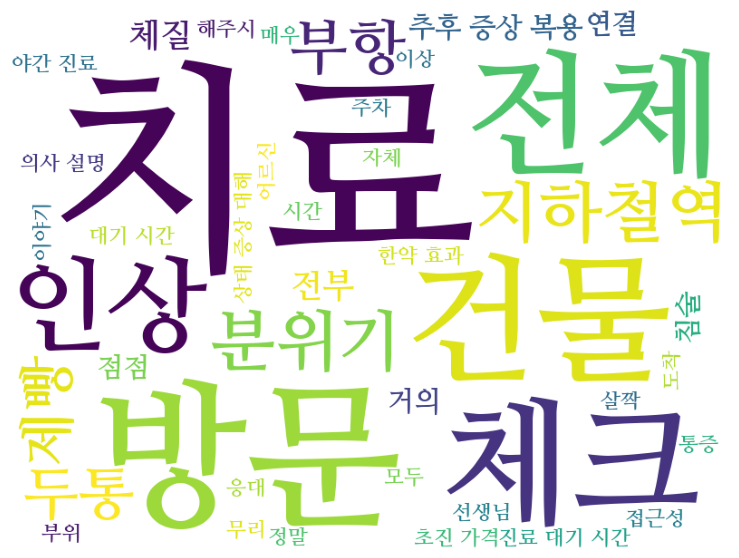

In [62]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\NanumMyeongjoBold.ttf",
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(new_word_freq))
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## **NETWORK**

In [65]:
for_network.head()

,hospital,stars,reviews,adress
76,강내과의원서강약손한의원,7.8,"[방과, 방, 접목, 진료, 상담, 한약, 위치, 이마트, 앞, 주차, 한약, 기적...",부산
77,강내과의원서강약손한의원,8.0,"[감기, 원장, 설명, 환자, 말, 모습, 감기, 내, 약, 주사, 다른, 곳, 가...",부산
198,안한의원,8.0,"[팔목, 지인, 소개, 침, 그, 이후, 다리, 때, 머리, 이유, 때, 목, 때,...",부산
390,명지365다나슬한의원,6.5,"[일요일, 병원, 신랑, 일이, 정말, 대충, 치료, 신설, 의사, 설명, 것, 전...",부산
391,명지365다나슬한의원,7.8,"[골프, 허리, 침, 효과, 번, 방문, 때, 주차장, 좀, 협소해, 주차, 공간,...",부산


In [66]:
network_an = []

for i in for_network.reviews:
    if '치료' in i:
        network_an.append(i)
    if '전체' in i :
        network_an.append(i)
    if '인상' in i :
        network_an.append(i)
    if '방문' in i:
        network_an.append(i)
    if '분위기' in i:
        network_an.append(i)
    if '체크' in i:
        network_an.append(i)
    if '건물' in i:
        network_an.append(i)
    if '지하철역' in i:
        network_an.append(i)
    # if '편이' in i:
    #     network_an.append(i)
    # if '지인' in i:
    #     network_an.append(i)
 
network_an_df = pd.DataFrame({'reviews': network_an})
print(network_an_df.shape)
network_an_df.head()

(80, 1)


,reviews
0,"[일요일, 병원, 신랑, 일이, 정말, 대충, 치료, 신설, 의사, 설명, 것, 전..."
1,"[골프, 허리, 침, 효과, 번, 방문, 때, 주차장, 좀, 협소해, 주차, 공간,..."
2,"[지인, 추천, 가게, 습, 의사, 선생님, 진짜, 하나, 설명, 사진, 보시, 설..."
3,"[어머니, 허리, 도수, 치료, 자주, 저, 어깨, 하니, 의사, 선생님, 남자, ..."
4,"[저희, 동네, 방문, 병원, 카운터, 정신, 안내, 시간, 조금, 치료, 그냥, ..."


In [83]:
from apyori import apriori
result = (list(apriori(network_an_df.reviews, min_support = 0.2)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['support'] >= 0.2)].sort_values(by='support', ascending = False)
df.head()

,items,support,ordered_statistics,length
28,(치료),0.8000,"[((), (치료), 0.8, 1.0)]",1
10,(방문),0.6375,"[((), (방문), 0.6375, 1.0)]",1
11,(병원),0.5625,"[((), (병원), 0.5625, 1.0)]",1
106,"(방문, 치료)",0.5000,"[((), (방문, 치료), 0.5, 1.0), ((방문), (치료), 0.7843...",2
29,(침),0.4750,"[((), (침), 0.475, 1.0)]",1


In [84]:
network_df = df.copy()
df_network = network_df[network_df['length']==2]
df_network.head()

,items,support,ordered_statistics,length
106,"(방문, 치료)",0.5000,"[((), (방문, 치료), 0.5, 1.0), ((방문), (치료), 0.7843...",2
117,"(병원, 치료)",0.4250,"[((), (병원, 치료), 0.425, 1.0), ((병원), (치료), 0.75...",2
100,"(병원, 방문)",0.4125,"[((), (병원, 방문), 0.4125, 1.0), ((방문), (병원), 0.6...",2
155,"(침, 치료)",0.4000,"[((), (침, 치료), 0.4, 1.0), ((치료), (침), 0.5, 1.0...",2
133,"(치료, 선생님)",0.3750,"[((), (치료, 선생님), 0.375, 1.0), ((선생님), (치료), 0....",2


In [85]:
index= []

for num, i in enumerate (df_network['items']):
    if '치료' in i:
        index.append(num)
    if '전체' in i:
        index.append(num)
    if '인상' in i:
        index.append(num)
    if '방문' in i:
        index.append(num)
    if '분위기' in i:
        index.append(num)
    if '체크' in i:
        index.append(num)
    if '건물' in i:
        index.append(num)
    if '지하철역' in i:
        index.append(num)
    # if '편이' in i:
    #     index.append(num)
    # if '지인' in i:
    #     index.append(num)

In [86]:
net_an = df_network.iloc[index]
net_an.head()

,items,support,ordered_statistics,length
106,"(방문, 치료)",0.5000,"[((), (방문, 치료), 0.5, 1.0), ((방문), (치료), 0.7843...",2
106,"(방문, 치료)",0.5000,"[((), (방문, 치료), 0.5, 1.0), ((방문), (치료), 0.7843...",2
117,"(병원, 치료)",0.4250,"[((), (병원, 치료), 0.425, 1.0), ((병원), (치료), 0.75...",2
100,"(병원, 방문)",0.4125,"[((), (병원, 방문), 0.4125, 1.0), ((방문), (병원), 0.6...",2
155,"(침, 치료)",0.4000,"[((), (침, 치료), 0.4, 1.0), ((치료), (침), 0.5, 1.0...",2


In [87]:
#그래프로 표현
import networkx as nx
G = nx.Graph()
ar = (net_an['items'])
G.add_edges_from(ar)

In [88]:
#페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 1000 * (nsize - min(nsize) / (max(nsize)-min(nsize)))

C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


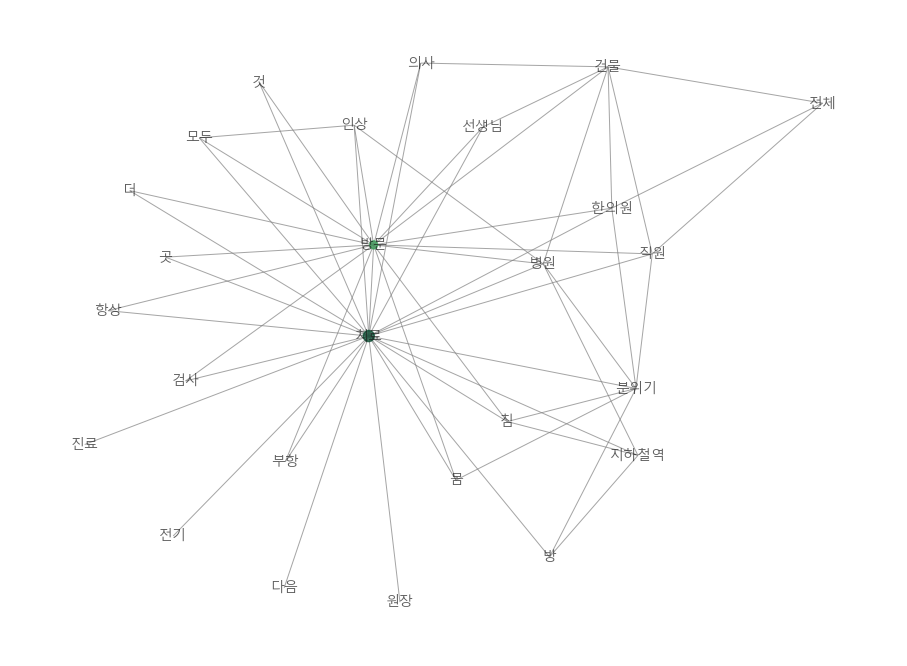

In [89]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

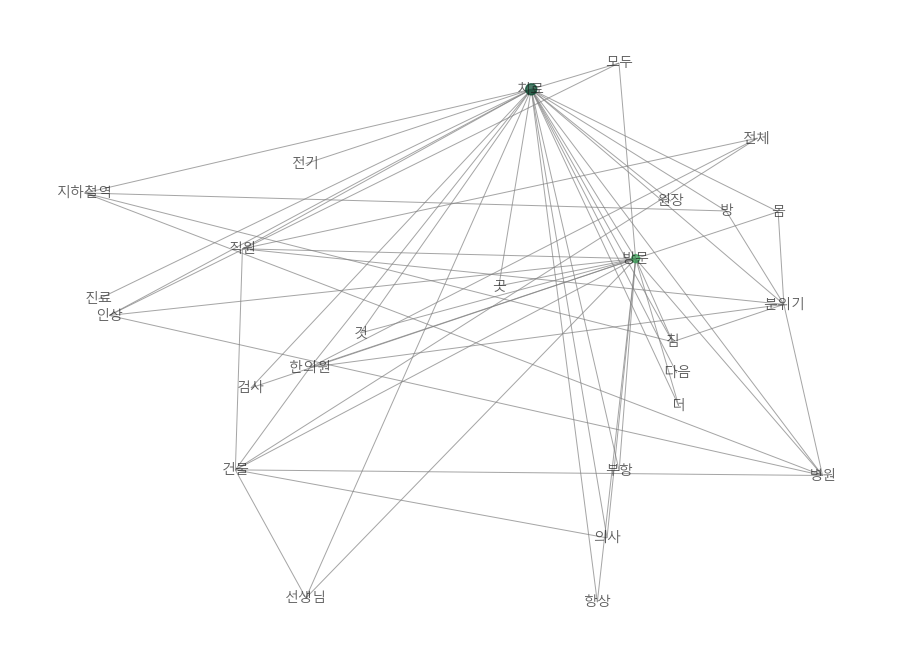

In [90]:
pos = nx.random_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

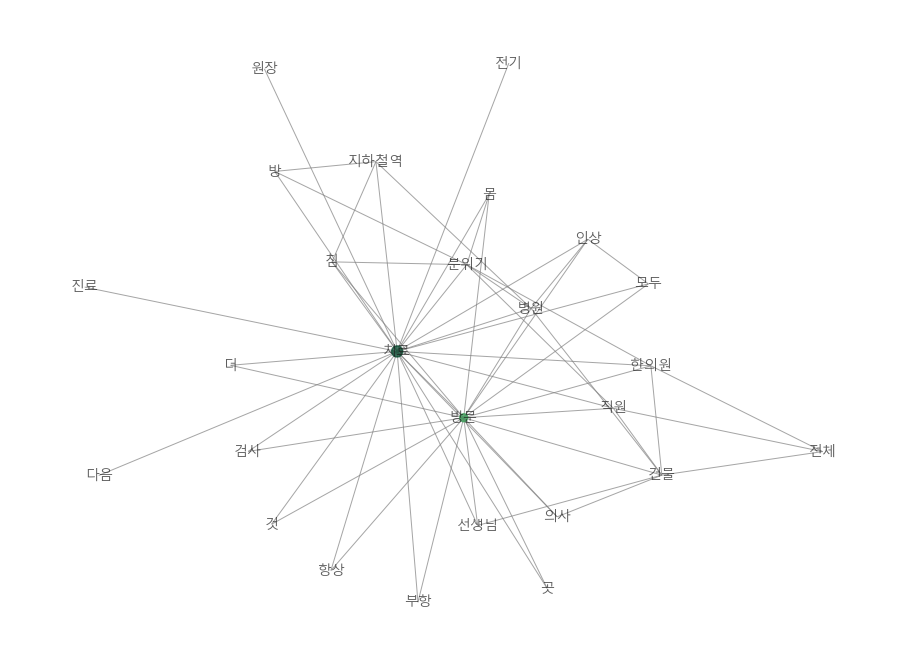

In [91]:
pos = nx.spring_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

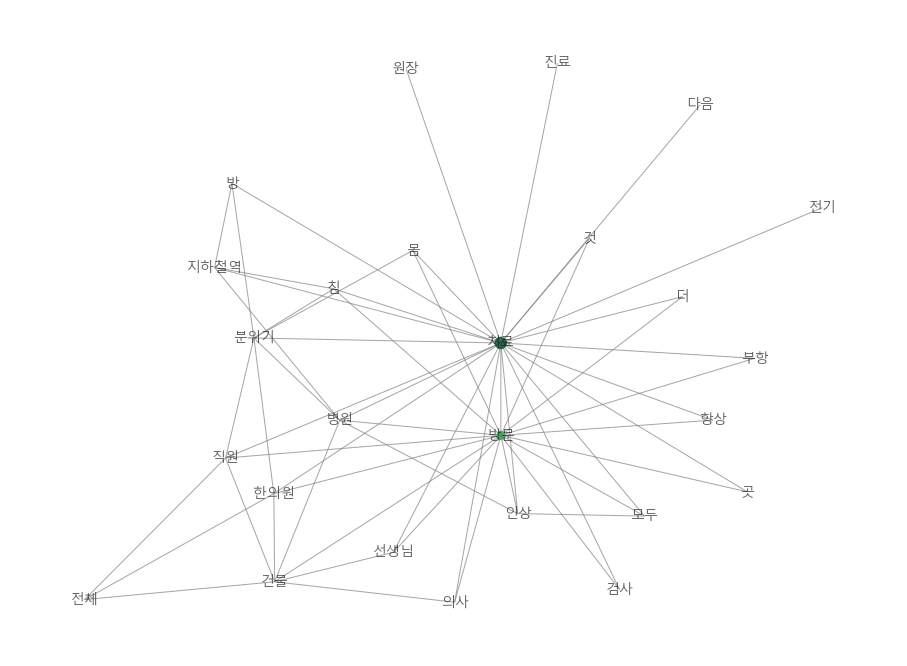

In [92]:
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)